In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import pygal
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from matplotlib import pyplot as plt
# from scratch.working_with_data import rescale
# from scratch.multiple_regression import least_squares_fit, predict
# from scratch.gradient_descent import gradient_step

# from stats import mean, median, de_mean, standard_deviation, correlation
# from gradient_descent import minimize_stochastic, maximize_stochastic, maximize_batch
# from vector import dot, vector_add
# from normal import normal_cdf
# from matrix import make_matrix, get_column, shape, matrix_multiply
# from logistic_regression import *

import math
import os
import random
import sys
from functools import partial, reduce

from scipy.optimize import fmin_tnc

import tqdm

from typing import*

from collections import*
from scipy import*
from sklearn.metrics import*


In [2]:
# Room Size
sqft = np.array([750,800,850,900,950])
# Rent
rent = np.array([1160,1200,1280,1450,2000])
# Average Rent
f_0 = []
for _ in range(0,len(rent)):
    f_0.append(np.mean(rent))
# Residuals
resd = rent-f_0
resd


# stats.describe(rent)


array([-258., -218., -138.,   32.,  582.])

In [3]:
# Square Feet
sqft_mean_full = np.mean(sqft)
print(sqft_mean_full)
sqft_mean = np.mean(sqft[:-1])
print(sqft_mean)

850.0
825.0


In [4]:
# Rent
rent_mean_full = np.mean(rent)
print(rent_mean_full)
rent_mean = np.mean(rent[:-1])
print(rent_mean)

1418.0
1272.5


In [5]:
resd_1 = []
for i in range(len(rent)):
    resd_1.append(rent[i] - rent_mean_full )
    
resd_1

y_f2_mean = []

resd_1
resd_1_mean = np.mean(resd_1)

abc = []
abc_init = np.square(resd_1[0] - resd_1_mean)
abc.append(abc_init)
for i in range(1,5):
    var_0 = np.sum((resd_1[i]-resd_1_mean)**2)
    abc.append(var_0/(i))
# abcd = np.sum(abc)/5
# abcd
abc

# m = min(filter(lambda x: x > 0, abc))
# m = min(i for i in abc if i > 0)
# n = abc.index(m)
# n
# o = len(rent) - n

# a = 0
a_lst = []
for i in abc:
    if i > 0:
        a_lst.append(i)
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = n - 1
# o = len(y_f1) - n

# m
# Min
min_a = min(a_lst)
# min_a
n = abc.index(min_a)
o = len(rent) - n

print(n)
print(o)

if n > o:
    n = n + 1

# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(rent)):
    if i < n:
        delta_pos.append(resd_1[i])
    else:
        delta_neg.append(resd_1[i])
# delta_pos
d_pos = np.mean(delta_pos)
d_pos = d_pos * np.ones((n,1))
d_pos

if y_f2_mean == 0:
    y_f2_ind = o
    y_f2_mean = np.mean(y_f2[0:y_f2_ind])
    d_pos = y_f2_mean * np.ones((y_f2_ind,1))
    d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
d_pos    


# delta_neg
d_neg = np.mean(delta_neg)
d_neg = d_neg * np.ones((o-1,1))
d_neg

delta_final_1 = np.vstack((d_pos,delta_neg))
print(delta_final_1)

resd_1

3
2
[[-145.5]
 [-145.5]
 [-145.5]
 [-145.5]
 [ 582. ]]


[-258.0, -218.0, -138.0, 32.0, 582.0]

In [6]:
# delta T
delta_1 = np.mean(resd[0:len(rent)-1]) * np.ones((len(rent)-1,1))
print(delta_1)
# resd[len(rent)-1]
# delta_1 = np.vstack((delta_1,resd[len(rent)-1]))
# f_1 = np.mean(f_0[0:len(rent)-1])* np.ones((len(rent)-1,1)) + delta_1
# f_1
# f_0_1 = np.vstack(((np.mean(f_0[0:len(rent)])* np.ones((len(rent)-1,1))),rent[len(rent)-1])) 
f_0_1 = np.mean(f_0[0:len(rent)])* np.ones((len(rent)-1,1))
f_0_1 = f_0_1 + delta_1
f_1 = np.vstack((f_0_1,rent[len(rent)-1])) 
f_1

[[-145.5]
 [-145.5]
 [-145.5]
 [-145.5]]


array([[1272.5],
       [1272.5],
       [1272.5],
       [1272.5],
       [2000. ]])

In [7]:
#y - F_1
y_f1 = []
for i in range(len(rent)):
    y_f1.append(rent[i] - f_1[i]) 
y_f1

[array([-112.5]), array([-72.5]), array([7.5]), array([177.5]), array([0.])]

In [8]:
# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(rent)):
    if y_f1[i] >= 0:
        delta_pos.append(y_f1[i])
    else:
        delta_neg.append(y_f1[i])
delta_pos

delta_2 = []
for i in range(0,len(rent)):
    if y_f1[i] >= 0:
        delta_2.append(np.mean(delta_pos))
    else:
        delta_2.append(np.mean(delta_neg))
delta_2

[-92.5, -92.5, 61.666666666666664, 61.666666666666664, 61.666666666666664]

In [9]:
# F2
f_2 = []
for i in range(len(rent)):
    f_2.append(f_1[i] + delta_2[i])
f_2

[array([1180.]),
 array([1180.]),
 array([1334.16666667]),
 array([1334.16666667]),
 array([2061.66666667])]

In [10]:
# y - F2
y_f2 = []
for i in range(len(rent)):
    y_f2.append(rent[i] - f_2[i]) 
y_f2

[array([-20.]),
 array([20.]),
 array([-54.16666667]),
 array([115.83333333]),
 array([-61.66666667])]

In [11]:
np.median(y_f2)

-20.0

In [12]:
# delta T
delta_3 = np.mean(y_f2[0:len(rent)-1]) * np.ones((len(rent)-1,1))
delta_3 = np.vstack((delta_3,y_f2[len(rent)-1]))
print(delta_3)

[[ 15.41666667]
 [ 15.41666667]
 [ 15.41666667]
 [ 15.41666667]
 [-61.66666667]]


In [13]:
# F3
f_3 = []
for i in range(len(rent)):
    f_3.append(f_2[i] + delta_3[i])
f_3

[array([1195.41666667]),
 array([1195.41666667]),
 array([1349.58333333]),
 array([1349.58333333]),
 array([2000.])]

In [14]:
# y - F3
y_f3 = []
for i in range(len(rent)):
    y_f3.append(rent[i] - f_3[i]) 
y_f3

[array([-35.41666667]),
 array([4.58333333]),
 array([-69.58333333]),
 array([100.41666667]),
 array([0.])]

In [15]:
def find_best_split(x,y):
    best_loss = np.inf
    best_split = -1
    print(f"find_best_split in x={list(x)}")
    for v in x[1:]: # try all possible x values
        lefty = y[x<v]
        righty = y[x>=v]
        nl = len(lefty)
        nr = len(righty)
        if nl==0 or nr==0:
            continue
        # variance is same as MSE here
        # weight by proportion on left and right, get avg as loss
        loss = (np.var(lefty)*nl + np.var(righty)*nr)/2
        print(f"{lefty} | {righty}    candidate split x ={v:4d} loss {loss:8.1f}")
        if loss < best_loss:
            best_loss = loss
            best_split = v
    return float(best_loss), best_split

In [16]:
find_best_split(sqft,rent)

find_best_split in x=[750, 800, 850, 900, 950]
[1160] | [1200 1280 1450 2000]    candidate split x = 800 loss 194837.5
[1160 1200] | [1280 1450 2000]    candidate split x = 850 loss 142033.3
[1160 1200 1280] | [1450 2000]    candidate split x = 900 loss  79358.3
[1160 1200 1280 1450] | [2000]    candidate split x = 950 loss  24737.5


(24737.5, 950)

In [17]:
x = sqft
y = rent
best_loss = np.inf
best_split = -1
print(f"find_best_split in x={list(x)}")
for v in x[1:]:
    left_y = y[x<v]
    right_y = y[x >= v]

    nl = len(left_y)
    nr = len(right_y)
    
    if nl == 0 or nr == 0:
        continue
    loss = (np.var(left_y)*nl + np.var(right_y)*nr)/2
    print(f"{left_y} | {right_y}    candidate split x ={v:4d} loss {loss:8.1f}")
    if loss < best_loss:
        best_loss = loss
        best_split = v
    
    
print(left_y)
print(right_y)
print(loss)
print(best_loss)
print(best_split)

find_best_split in x=[750, 800, 850, 900, 950]
[1160] | [1200 1280 1450 2000]    candidate split x = 800 loss 194837.5
[1160 1200] | [1280 1450 2000]    candidate split x = 850 loss 142033.3
[1160 1200 1280] | [1450 2000]    candidate split x = 900 loss  79358.3
[1160 1200 1280 1450] | [2000]    candidate split x = 950 loss  24737.5
[1160 1200 1280 1450]
[2000]
24737.5
24737.5
950


In [18]:
sqft

array([750, 800, 850, 900, 950])

In [19]:
sqft_mean = np.mean(sqft)
summ = []

# for q in range(1,len(sqft)):
#     sum1 = np.sum(sqft[:q])
#     summ.append(sum1)
# #     for p in summ:
# #         print(p)
# summ
abc = []
abc_init = np.square(sqft[0] - sqft_mean)
abc.append(abc_init)
for i in range(1,5):
    var_0 = np.sum((sqft[i]-sqft_mean)**2)
    abc.append(var_0/(i+1))
# abcd = np.sum(abc)/5
# abcd
abc


[10000.0, 1250.0, 0.0, 625.0, 2000.0]

In [20]:
# y_f1
# y_f1_mean = np.mean(y_f1)

# abc = []
# abc_init = np.square(y_f1[0] - y_f1_mean)
# abc.append(abc_init)
# for i in range(1,5):
#     var_0 = np.sum((y_f1[i]-y_f1_mean)**2)
#     abc.append(var_0/(i+1))
# # abcd = np.sum(abc)/5
# # abcd
# abc

# # m = min(filter(lambda x: x > 0, abc))
# # m = min(i for i in abc if i > 0)
# a = 0
# for i in abc:
#     if i > 0:
#         m = i
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = 1
# o = len(y_f1) - n
# o

# # Delta 2
# delta_pos = []
# delta_neg = []
# for i in range(1,len(rent)):
#     if i < n+1:
#         delta_pos.append(y_f1[i])
#     else:
#         delta_neg.append(y_f1[i])
# delta_pos
# d_pos = np.mean(delta_pos)
# d_pos = d_pos * np.ones((n+1,1))
# d_pos

# delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o,1))
# d_neg

# delta_final = np.vstack((d_pos,d_neg))
# delta_final

In [21]:
y_f1
y_f1_mean = np.mean(y_f1)

abc = []
abc_init = np.square(y_f1[0] - y_f1_mean)
abc.append(abc_init)
for i in range(1,5):
    var_0 = np.sum((y_f1[i]-y_f1_mean)**2)
    abc.append(var_0/(i+1))
# abcd = np.sum(abc)/5
# abcd
abc


a_lst = []
for i in abc:
    if i > 0:
        a_lst.append(i)
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = n - 1
# o = len(y_f1) - n

# m
# Min
min_a = min(a_lst)
# min_a
n = abc.index(min_a)
o = len(rent) - n

print("n: ",n)
print("o: ",o)

if n > o:
    n = n + 1

# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(rent)):
    if i < n:
        delta_pos.append(y_f1[i])
    else:
        delta_neg.append(y_f1[i])
delta_pos
d_pos = np.mean(delta_pos)
d_pos = d_pos * np.ones((n,1))
d_pos

delta_neg
d_neg = np.mean(delta_neg)
d_neg = d_neg * np.ones((o,1))
d_neg

if y_f2_mean == 0:
    y_f2_ind = o
    y_f2_mean = np.mean(y_f2[0:y_f2_ind])
    d_pos = y_f2_mean * np.ones((y_f2_ind,1))
    d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
d_pos    

delta_final = np.vstack((d_pos,d_neg))
delta_final

n:  2
o:  3


array([[-92.5       ],
       [-92.5       ],
       [ 61.66666667],
       [ 61.66666667],
       [ 61.66666667]])

In [22]:
# y_f2 = np.array(y_f2)
# y_f2_mean = np.mean(y_f2)

# # if y_f2_mean == 0:
# #     y_f2_mean = np.mean(y_f2[0:len(y_f2)-1])

# abc = []
# abc_init = np.square(y_f2[0] - y_f2_mean)
# abc.append(abc_init)
# for i in range(1,5):
#     var_0 = np.sum((y_f2[i]-y_f2_mean)**2)
#     abc.append(var_0/(i+1))
# # abcd = np.sum(abc)/5
# # abcd
# abc


# a_lst = []
# for i in abc:
#     if i > 0:
#         a_lst.append(i)
# #         a = 1
# # n = abc.index(m)
# # if a == 1:
# #     n = n - 1
# # o = len(y_f1) - n

# # m
# # Min
# min_a = min(a_lst)
# # min_a
# n = abc.index(min_a)
# o = len(rent) - n

# # Delta 2
# delta_pos = []
# delta_neg = []
# for i in range(0,len(rent)):
#     if i < n:
#         delta_pos.append(y_f2[i])
#     else:
#         delta_neg.append(y_f2[i])
# delta_pos
# d_pos = np.mean(delta_pos)
# d_pos = d_pos * np.ones((n+1,1))

# delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o,1))
# d_neg

# # if y_f2_mean == 0:
# #     y_f2_ind = len(y_f2)-1
# #     y_f2_mean = np.mean(y_f2[0:y_f2_ind])
# #     d_pos = y_f2_mean * np.ones((y_f2_ind,1))
# #     d_neg = delta_neg[3]
    
# delta_neg

# # delta_final = np.vstack((d_pos,d_neg))
# # delta_final
# # delta_neg[len(y_f2)-1]

In [23]:
y_f2 = np.array(y_f2)
y_f2_mean = np.mean(y_f2)
print(y_f2_mean)

# if y_f2_mean == 0:
#     y_f2_mean = np.mean(y_f2[0:len(y_f2)-1])

abc = []
abc_init = np.square(y_f2[0] - y_f2_mean)
abc.append(abc_init)
for i in range(1,5):
    var_0 = np.sum((y_f2[i]-y_f2_mean)**2)
    abc.append(var_0/(i+1))
# abcd = np.sum(abc)/5
# abcd
abc


a_lst = []
for i in abc:
    if i > 0:
        a_lst.append(i)
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = n - 1
# o = len(y_f1) - n

# m
# Min
min_a = min(a_lst)
# min_a
n = abc.index(min_a)
o = len(rent) - n
print("N: ", n)
print("O: ",o)

if n > o:
    n = n + 1

# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(rent)):
    if i < n:
        delta_pos.append(y_f2[i])
    else:
        delta_neg.append(y_f2[i])
delta_pos
d_pos = np.mean(delta_pos)
d_pos = d_pos * np.ones((n,1))

delta_neg
d_neg = np.mean(delta_neg)
d_neg = d_neg * np.ones((o,1))
d_neg

if y_f2_mean == 0:
    y_f2_ind = o
    y_f2_mean = np.mean(y_f2[0:y_f2_ind])
    d_pos = y_f2_mean * np.ones((y_f2_ind,1))
    d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
d_pos    
# delta_neg[y_f2_ind-1]
# d_neg
# n
delta_final = np.vstack((d_pos,d_neg))
print(delta_final)
# delta_neg[len(y_f2)-1]
# delta_neg
print(delta_neg)
print(delta_pos)
print(y_f2_mean)
print(y_f2_ind)
print(y_f2[0:o])

0.0
N:  1
O:  4
[[ 15.41666667]
 [ 15.41666667]
 [ 15.41666667]
 [ 15.41666667]
 [-61.66666667]]
[array([20.]), array([-54.16666667]), array([115.83333333]), array([-61.66666667])]
[array([-20.])]
15.416666666666629
4
[[-20.        ]
 [ 20.        ]
 [-54.16666667]
 [115.83333333]]


In [24]:
# F3
f_3 = []
for i in range(len(rent)):
    f_3.append(f_2[i] + delta_final[i])
f_3

[array([1195.41666667]),
 array([1195.41666667]),
 array([1349.58333333]),
 array([1349.58333333]),
 array([2000.])]

In [25]:
# y - F3
y_f3 = []
for i in range(len(rent)):
    y_f3.append(rent[i] - f_3[i]) 
y_f3



[array([-35.41666667]),
 array([4.58333333]),
 array([-69.58333333]),
 array([100.41666667]),
 array([0.])]

In [26]:
# y_f3 = np.array(y_f3)
# y_f3_mean = np.mean(y_f3)

# # if y_f2_mean == 0:
# #     y_f2_mean = np.mean(y_f2[0:len(y_f2)-1])

# abc = []
# abc_init = np.square(y_f3[0] - y_f3_mean)
# abc.append(abc_init)
# for i in range(1,5):
#     var_0 = np.sum((y_f3[i]-y_f3_mean)**2)
#     abc.append(var_0/(i+1))
# # abcd = np.sum(abc)/5
# # abcd
# abc


# a_lst = []
# for i in abc:
#     if i > 0:
#         a_lst.append(i)
# #         a = 1
# # n = abc.index(m)
# # if a == 1:
# #     n = n - 1
# # o = len(y_f1) - n

# # m
# # Min
# min_a = min(a_lst)
# # min_a
# n = abc.index(min_a)
# o = len(rent) - n

# # # Delta 2
# # delta_pos = []
# # delta_neg = []
# # for i in range(0,len(rent)):
# #     if i < n:
# #         delta_pos.append(y_f3[i])
# #     else:
# #         delta_neg.append(y_f3[i])
# # delta_pos
# # d_pos = np.mean(delta_pos)
# # d_pos = d_pos * np.ones((n+1,1))

# # delta_neg
# # d_neg = np.mean(delta_neg)
# # d_neg = d_neg * np.ones((o,1))
# # d_neg

# if y_f3_mean == 0:
#     y_f3_ind = n 
#     y_f3_mean = np.mean(y_f3[0:y_f3_ind])
#     d_pos = y_f3_mean * np.ones((y_f3_ind,1))
#     d_neg = delta_neg[n-o] * np.ones((len(rent)-n,1))
# d_pos    
# # # delta_neg[y_f2_ind-1]
# d_neg
# # # n
# # delta_final = np.vstack((d_pos,d_neg))
# # delta_final
# # # delta_neg[len(y_f2)-1]

In [27]:
# y_f2 = y_f3
# y_f2 = np.array(y_f2)
# y_f2_mean = np.mean(y_f2)

# # if y_f2_mean == 0:
# #     y_f2_mean = np.mean(y_f2[0:len(y_f2)-1])

# abc = []
# abc_init = np.square(y_f2[0] - y_f2_mean)
# abc.append(abc_init)
# for i in range(1,5):
#     var_0 = np.sum((y_f2[i]-y_f2_mean)**2)
#     abc.append(var_0/(i+1))
# # abcd = np.sum(abc)/5
# abc = abc[0].tolist() + abc[1:5]



# a_lst = []
# for i in abc:
#     if i > 0:
#         a_lst.append(i)
# #         a = 1
# # n = abc.index(m)
# # if a == 1:
# #     n = n - 1
# # o = len(y_f1) - n

# # m
# # Min
# min_a = min(a_lst)
# # min_a
# n = abc.index(min_a)
# o = len(rent) - n

# print("N: ", n)
# print("O: ", o)

# # Delta 2
# delta_pos = []
# delta_neg = []
# for i in range(0,len(rent)):
#     if i < n:
#         delta_pos.append(y_f2[i])
#     else:
#         delta_neg.append(y_f2[i])
# delta_pos
# d_pos = np.mean(delta_pos)
# d_pos = d_pos * np.ones((n+1,1))

# delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o,1))

# # d_pos
# # d_neg

# if y_f2_mean == 0:
#     y_f2_ind = o
# #     y_f2_mean = np.mean(y_f2[0:y_f2_ind])
#     y_f2_mean = np.mean(np.array(a_lst))
#     d_pos = y_f2_mean * np.ones((y_f2_ind,1))
#     d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
# d_pos    
# # # delta_neg[y_f2_ind-1]
# d_neg
# # # n
# delta_final = np.vstack((d_pos,d_neg))
# delta_final
# # delta_neg[len(y_f2)-1]
# y_f2_mean


In [28]:
# resd_1 = []
# for i in range(len(rent)):
#     resd_1.append(rent[i] - y_f2_mean)
    
# resd_1

# resd_1
# resd_1_mean = np.mean(resd_1)

# abc = []
# abc_init = np.square(resd_1[0] - resd_1_mean)
# abc.append(abc_init)
# for i in range(1,5):
#     var_0 = np.sum((resd_1[i]-resd_1_mean)**2)
#     abc.append(var_0/(i))
# # abcd = np.sum(abc)/5
# # abcd
# abc

# # m = min(filter(lambda x: x > 0, abc))
# # m = min(i for i in abc if i > 0)
# # n = abc.index(m)
# # n
# # o = len(rent) - n

# # a = 0
# a_lst = []
# for i in abc:
#     if i > 0:
#         a_lst.append(i)
# #         a = 1
# # n = abc.index(m)
# # if a == 1:
# #     n = n - 1
# # o = len(y_f1) - n

# # m
# # Min
# min_a = min(a_lst)
# # min_a
# n = abc.index(min_a)
# o = len(rent) - n

# # Delta 2
# delta_pos = []
# delta_neg = []
# for i in range(0,len(rent)):
#     if i < n+1:
#         delta_pos.append(resd_1[i])
#     else:
#         delta_neg.append(resd_1[i])
# # delta_pos
# d_pos = np.mean(delta_pos)
# d_pos = d_pos * np.ones((n+1,1))
# d_pos

# if y_f2_mean == 0:
#     y_f2_ind = o
#     y_f2_mean = np.mean(y_f2[0:y_f2_ind])
#     d_pos = y_f2_mean * np.ones((y_f2_ind,1))
#     d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
# d_pos    


# # delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o-1,1))
# d_neg

# delta_final = np.vstack((d_pos,delta_neg))
# print(delta_final)

# print(n)
# print(o)
# abc

In [29]:
# y - F3
y_f3 = []
for i in range(len(rent)):
    y_f3.append(rent[i] - f_3[i]) 
y_f3

# y_f3_ind = y_f3.index(0)
# y_f3_ind


[array([-35.41666667]),
 array([4.58333333]),
 array([-69.58333333]),
 array([100.41666667]),
 array([0.])]

In [30]:
y_f3 = np.array(y_f3)
y_f3_mean = np.mean(y_f3)

# if y_f2_mean == 0:
#     y_f2_mean = np.mean(y_f2[0:len(y_f2)-1])

abc = []
abc_init = np.square(y_f3[0] - y_f3_mean)
abc.append(abc_init)
for i in range(1,5):
    var_0 = np.sum((y_f3[i]-y_f3_mean)**2)
    abc.append(var_0/(i+1))
# abcd = np.sum(abc)/5
# abcd
abc = abc[0].tolist() + abc[1:5]
abc


a_lst = []
for i in abc:
    if i > 0:
        a_lst.append(i)
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = n - 1
# o = len(y_f1) - n
a_lst

# m
# Min
min_a = min(a_lst)
# min_a
n = abc.index(min_a)
o = len(rent) - n
print("N: ", n)
print("O: ", o)

if n > o:
    n = n+1

# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(rent)):
    if i < n:
        delta_pos.append(y_f3[i])
    else:
        delta_neg.append(y_f3[i])
delta_pos
# d_pos = np.mean(delta_pos)
# d_pos = d_pos * np.ones((n+1,1))
# d_pos
delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o,1))
# d_neg

if y_f3_mean == 0:
    y_f3_ind = o
    print(y_f3_ind)
    if y_f3_ind >= 0:
        y_f3_mean = np.mean(y_f3[0:y_f3_ind-1])
        d_pos = y_f3_mean * np.ones((y_f3_ind,1))
    #     d_neg = y_f3_mean
        d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
    else:
        y_f3_mean = np.mean(y_f3[0:y_f3_ind])
        d_pos = y_f3_mean * np.ones((y_f3_ind,1))
    #     d_neg = y_f3_mean
        d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
# d_pos    
# # delta_neg[y_f2_ind-1]
# d_neg
# # n
delta_final = np.vstack((d_pos,d_neg))
# # delta_neg[len(y_f2)-1]
print(delta_neg)
print(delta_pos)
print(d_pos)
print(d_neg)
print(y_f3_mean)
print(delta_final)

N:  1
O:  4
4
[array([4.58333333]), array([-69.58333333]), array([100.41666667]), array([0.])]
[array([-35.41666667])]
[[-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [-33.47222222]]
[[0.]]
-33.47222222222217
[[-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [  0.        ]]


In [31]:
if y_f3_mean == 0:
    y_f3_ind = o
    y_f3_mean = np.mean(y_f3[0:y_f3_ind])
    d_pos = y_f3_mean * np.ones((y_f3_ind,1))
    d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
d_pos 
d_neg

delta_final_3 = np.vstack((d_pos,d_neg))
print(delta_final_3)

[[-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [  0.        ]]


In [32]:
# F4
f_4 = []
for i in range(len(rent)):
    f_4.append(f_3[i] + delta_final[i])
f_4

[array([1161.94444444]),
 array([1161.94444444]),
 array([1316.11111111]),
 array([1316.11111111]),
 array([2000.])]

In [33]:
# y - F4
y_f4 = []
for i in range(len(rent)):
    y_f4.append(rent[i] - f_4[i]) 
y_f4

# y_f3_ind = y_f3.index(0)
# y_f3_ind


[array([-1.94444444]),
 array([38.05555556]),
 array([-36.11111111]),
 array([133.88888889]),
 array([0.])]

In [34]:
rms = mean_absolute_error(rent,f_4)
rms

42.0

In [35]:
MSE = np.square(np.subtract(rent,f_2)).mean() 
MSE

202906.16666666663

In [36]:
print(delta_final_1)
print(delta_2)
print(delta_final)

[[-145.5]
 [-145.5]
 [-145.5]
 [-145.5]
 [ 582. ]]
[-92.5, -92.5, 61.666666666666664, 61.666666666666664, 61.666666666666664]
[[-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [-33.47222222]
 [  0.        ]]


In [37]:
# Plot 1
ff = []
for i in range(len(rent)):
    ff.append(f_0[i] + delta_final_1[i] + delta_2[i] + delta_3[i])
# ff = np.multiply(0.5,ff)

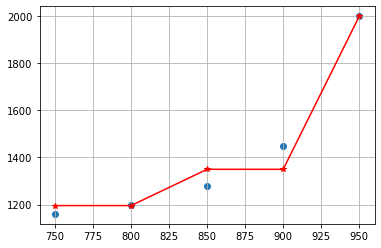

In [38]:
plt.scatter(sqft,rent)
plt.plot(sqft,ff, marker='*', color='red')
plt.grid()
plt.show()

In [39]:
ff

[array([1195.41666667]),
 array([1195.41666667]),
 array([1349.58333333]),
 array([1349.58333333]),
 array([2000.])]

In [40]:
sqft[len(ff)//2]
sqft
ff[-2]

array([1349.58333333])

In [41]:
# # Create stepped plots
# sqft_2 = []
# rent_2 = []
# for i in range(1,len(rent)):
#     sqft_2.append(sqft[i-1])
#     rent_2.append(ff[i])
#     if abs(ff[i]-ff[i-1]) != 0:
#         print(i)
# #         print((sqft[i] + sqft[i-1])/2)
#         sqft_2.append((sqft[i] + sqft[i-1])/2)
#         rent_2.append(ff[i-1])        
#     if i == len(rent)-1:
#         print(i)
#         sqft_2.append(sqft[len(rent)-1])
#         rent_2.append(rent[len(rent)-1])  
        
        
# print(np.sort(rent_2))
# print(sqft_2)

In [42]:
# Create stepped plots
sqft_2 = []
rent_2 = []
for i in range(1,len(ff)):
    sqft_2.append(sqft[i-1])
    rent_2.append(ff[i])
    if abs(ff[i]-ff[i-1]) != 0:
#         print((sqft[i] + sqft[i-1])/2)
        sqft_2.append((sqft[i] + sqft[i-1])/2)
        sqft_2.append((sqft[i] + sqft[i-1])/2)
        rent_2.append(ff[1])   
        rent_2.append(ff[i-1])
    if i == len(ff)-1:
        print(i)
        sqft_2.append(sqft[len(rent)-1])
        rent_2.append(rent[len(rent)-1])  
        
rent_2 = np.sort(rent_2)      
print(rent_2)
print(sqft_2)

4
[array([1195.41666667]) array([1195.41666667]) array([1195.41666667])
 array([1195.41666667]) array([1349.58333333]) array([1349.58333333])
 array([1349.58333333]) array([2000.]) 2000]
[750, 800, 825.0, 825.0, 850, 900, 925.0, 925.0, 950]


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [43]:
for j in range(1,len(rent_2)):
    if sqft_2[j] - sqft_2[j-1] == 0:
        rent_2[j] = rent_2[j+1]
rent_2


array([array([1195.41666667]), array([1195.41666667]),
       array([1195.41666667]), array([1349.58333333]),
       array([1349.58333333]), array([1349.58333333]),
       array([1349.58333333]), 2000, 2000], dtype=object)

In [44]:
# # Create stepped plots
# sqft_2 = []
# rent_2 = []
# for i in range(0,len(rent)):
#     sqft_2.append(sqft[i])
#     rent_2.append(ff[i])
#     if abs(ff[i]-ff[i+1]) != 0:
# #         print((sqft[i] + sqft[i-1])/2)
#         sqft_2.append((sqft[i] + sqft[i+1])/2)
#         sqft_2.append((sqft[i] + sqft[i+1])/2)
#         rent_2.append(ff[1])   
#         rent_2.append(ff[i-1])
#     if i == len(rent):
#         print(i)
#         sqft_2.append(sqft[len(rent)])
#         rent_2.append(rent[len(rent)])  
        
# # rent_2 = np.sort(rent_2)      
# print(rent_2)
# print(sqft_2)

In [45]:
# # Create stepped plots
# sqft_2 = []
# rent_2 = []
# for i in range(1,len(rent)):
#     sqft_2.append(sqft[i-1])
#     rent_2.append(ff[i])
#     if abs(ff[i]-ff[i-1]) != 0:
# #         print((sqft[i] + sqft[i-1])/2)
#         sqft_2.append((sqft[i] + sqft[i-1])/2)
#         rent_2.append(ff[1])        
#     if i == len(rent)-1:
#         print(i)
#         sqft_2.append(sqft[len(rent)-1])
#         rent_2.append(rent[i])  
        
# rent_2 = np.sort(rent_2)      
# print(rent_2)
# print(sqft_2)

In [46]:
rent

array([1160, 1200, 1280, 1450, 2000])

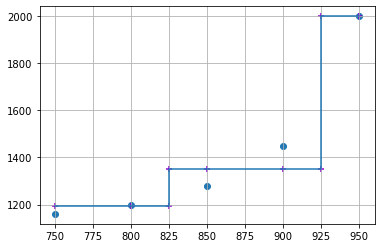

In [47]:
plt.scatter(sqft,rent)
plt.scatter(sqft_2,rent_2, marker='+', color='darkviolet')
plt.plot(sqft_2,rent_2)
# plt.plot(sqft,ff, marker='*', color='red')
plt.grid()
plt.show()

In [48]:
ff

[array([1195.41666667]),
 array([1195.41666667]),
 array([1349.58333333]),
 array([1349.58333333]),
 array([2000.])]

In [49]:
df = pd.read_csv("golf3.txt")
dec_org = df['Decision']
df.head(15)

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,46
3,Rain,Mild,High,Weak,45
4,Rain,Cool,Normal,Weak,52
5,Rain,Cool,Normal,Strong,23
6,Overcast,Cool,Normal,Strong,43
7,Sunny,Mild,High,Weak,35
8,Sunny,Cool,Normal,Weak,38
9,Rain,Mild,Normal,Weak,46


In [50]:
dec_org_lst = dec_org.tolist()

epoch = []
epoch = pd.DataFrame(dec_org)
epoch

,Decision
0,25
1,30
2,46
3,45
4,52
5,23
6,43
7,35
8,38
9,46


In [51]:
# Overcast
overcast = []
for i in range(0,len(dec_org)):
    if df['Outlook'][i] == 'Overcast':
        overcast.append(dec_org[i])
        
overcast = np.mean(overcast)
overcast

46.25

In [52]:
# Create lists of labels
outlook_labels = [] 
temp_labels = []
hum_labels = []
wind_labels = []

# inputs[2][0]

for i in range(len(dec_org )):
    if df['Outlook'][i] not in outlook_labels:
        outlook_labels.append(df['Outlook'][i])
    if df['Temp'][i] not in temp_labels:
        temp_labels.append(df['Temp'][i])
    if df['Humidity'][i] not in hum_labels:
        hum_labels.append(df['Humidity'][i])
    if df['Wind'][i] not in wind_labels:
        wind_labels.append(df['Wind'][i])
outlook_labels

['Sunny', 'Overcast', 'Rain']

In [53]:
# Creating a Decision Tree using Panda
outlook = df['Outlook']
temp = df['Temp']
humidity = df['Humidity']
wind = df['Wind']
decision = df['Decision']

class Candidate(NamedTuple):
    outlook: str
    temp: str
    humidity: str
    wind: str
    decision: Optional[float] = None  # allow unlabeled data
        
# inputs = Candidate(outlook,temp,humidity,wind,decision)

inputs = []
for i in range(len(df)):
    inputs.append(Candidate(df['Outlook'][i],df['Temp'][i],df['Humidity'][i],df['Wind'][i],dec_org[i]))
inputs

[Candidate(outlook='Sunny', temp='Hot', humidity='High', wind='Weak', decision=25),
 Candidate(outlook='Sunny', temp='Hot', humidity='High', wind='Strong', decision=30),
 Candidate(outlook='Overcast', temp='Hot', humidity='High', wind='Weak', decision=46),
 Candidate(outlook='Rain', temp='Mild', humidity='High', wind='Weak', decision=45),
 Candidate(outlook='Rain', temp='Cool', humidity='Normal', wind='Weak', decision=52),
 Candidate(outlook='Rain', temp='Cool', humidity='Normal', wind='Strong', decision=23),
 Candidate(outlook='Overcast', temp='Cool', humidity='Normal', wind='Strong', decision=43),
 Candidate(outlook='Sunny', temp='Mild', humidity='High', wind='Weak', decision=35),
 Candidate(outlook='Sunny', temp='Cool', humidity='Normal', wind='Weak', decision=38),
 Candidate(outlook='Rain', temp='Mild', humidity='Normal', wind='Weak', decision=46),
 Candidate(outlook='Sunny', temp='Mild', humidity='Normal', wind='Strong', decision=48),
 Candidate(outlook='Overcast', temp='Mild', hu

In [54]:
# Weather - Sunny
w1 = {}
w1_prob = {}

for j in range(0,len(temp_labels)):
    weather = []
    for i in range(0,len(inputs)):
        if inputs[i][0] == 'Sunny' and inputs[i][1] == temp_labels[j]:
            weather.append(inputs[i][4])
    w1[temp_labels[j]] = weather
    w1_prob[temp_labels[j]]  = np.mean(weather)
    

sunny_temp = w1_prob

for j in range(len(w1_prob)):
    weather_sun = 'sunny_temp_' + str(temp_labels[j]).lower()
    sun = exec(weather_sun + '=' + str(w1_prob[temp_labels[j]]))
    
# Print trees
sun_temp_hot = sunny_temp['Hot']
sun_temp_mild = sunny_temp['Mild']
sun_temp_cool = sunny_temp['Cool']
print('Sunny_temp1:',sun_temp_hot)

print('Sunny_temp2:',sunny_temp_hot)
w1_prob['Hot']
sunny_temp

Sunny_temp1: 27.5
Sunny_temp2: 27.5


{'Hot': 27.5, 'Mild': 41.5, 'Cool': 38.0}

In [55]:
# Weather - Wind

w1 = {}
w1_prob = {}
for j in range(0,len(wind_labels)):
#     print(temp_labels[j])
    weather = []
    for i in range(0,len(inputs)):
        if inputs[i][0] == 'Rain' and inputs[i][3] == wind_labels[j]:
            weather.append(inputs[i][4])
    w1[wind_labels[j]] = weather
    w1_prob[wind_labels[j]]  = np.mean(weather)

rain_wind = w1_prob

for j in range(len(w1_prob)):
    weather_rain = 'rain_wind' + str(wind_labels[j])
    rain_1 = exec(weather_rain + '=' + str(inputs[i][4]))


w1_prob

{'Weak': 47.666666666666664, 'Strong': 26.5}

In [56]:
# Weather - Sunny
w1 = {}
w1_prob = {}

for j in range(0,len(temp_labels)):
    weather = []
    for i in range(0,len(inputs)):
        if inputs[i][0] == 'Sunny' and inputs[i][1] == temp_labels[j]:
            weather.append(inputs[i][4])
    w1[temp_labels[j]] = weather
    w1_prob[temp_labels[j]]  = np.mean(weather)
    

sunny_temp = w1_prob

for j in range(len(w1_prob)):
    weather_sun = 'sunny_temp_' + str(temp_labels[j]).lower()
    sun = exec(weather_sun + '=' + str(w1_prob[temp_labels[j]]))
    
# Print trees
sun_temp_hot = sunny_temp['Hot']
sun_temp_mild = sunny_temp['Mild']
sun_temp_cool = sunny_temp['Cool']
print('Sunny_temp1:',sun_temp_hot)

print('Sunny_temp2:',sunny_temp_hot)
w1_prob['Hot']
sunny_temp

Sunny_temp1: 27.5
Sunny_temp2: 27.5


{'Hot': 27.5, 'Mild': 41.5, 'Cool': 38.0}

In [57]:
# Decisions
dec_prob = []
for i in range(len(inputs)):
    if inputs[i][0] == 'Sunny':
        if inputs[i][1] == 'Hot':
            dec_prob.append(w1_prob['Hot'])
            print(w1_prob['Hot'])
        elif inputs[i][1] == 'Mild':
            dec_prob.append(w1_prob['Mild'])
            print(w1_prob['Mild'])
        elif inputs[i][1] == 'Cool':
            dec_prob.append(w1_prob['Cool'])
            print(w1_prob['Cool'])
    elif inputs[i][0] == 'Rain':
        if inputs[i][3] == 'Weak':
            dec_prob.append(rain_wind['Weak'])
            print(rain_wind['Weak'])
        elif inputs[i][3] == 'Strong':
            dec_prob.append(rain_wind['Strong'])
            print(rain_wind['Strong'])
    elif inputs[i][0] == 'Overcast':
        dec_prob.append(overcast)
        print(overcast)
# dec_prob

27.5
27.5
46.25
47.666666666666664
47.666666666666664
26.5
46.25
41.5
38.0
47.666666666666664
41.5
46.25
46.25
26.5


In [58]:
f_0 = dec_prob
f_0

[27.5,
 27.5,
 46.25,
 47.666666666666664,
 47.666666666666664,
 26.5,
 46.25,
 41.5,
 38.0,
 47.666666666666664,
 41.5,
 46.25,
 46.25,
 26.5]

In [59]:
epoch['f_0']= pd.DataFrame(f_0)
resd = dec_org - f_0
epoch['delta_1'] = pd.DataFrame(resd)
epoch

,Decision,f_0,delta_1
0,25,27.500000,-2.500000
1,30,27.500000,2.500000
2,46,46.250000,-0.250000
3,45,47.666667,-2.666667
4,52,47.666667,4.333333
5,23,26.500000,-3.500000
6,43,46.250000,-3.250000
7,35,41.500000,-6.500000
8,38,38.000000,0.000000
9,46,47.666667,-1.666667


In [60]:
# delta T
delta_1 = np.mean(resd[0:len(dec_org)-1]) * np.ones((len(dec_org)-1,1))
print(delta_1)
# resd[len(rent)-1]
# delta_1 = np.vstack((delta_1,resd[len(rent)-1]))
# f_1 = np.mean(f_0[0:len(rent)-1])* np.ones((len(rent)-1,1)) + delta_1
# f_1
# f_0_1 = np.vstack(((np.mean(f_0[0:len(rent)])* np.ones((len(rent)-1,1))),rent[len(rent)-1])) 
# f_0_1 = np.mean(f_0[0:len(dec_org)])* np.ones((len(dec_org)-1,1))
f_1 = f_0 + delta_1
# f_1 = np.vstack((f_0,dec_org[len(dec_org)-1])) 
f_1 = f_1[0]
f_1

[[-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]
 [-0.26923077]]


array([27.23076923, 27.23076923, 45.98076923, 47.3974359 , 47.3974359 ,
       26.23076923, 45.98076923, 41.23076923, 37.73076923, 47.3974359 ,
       41.23076923, 45.98076923, 45.98076923, 26.23076923])

In [61]:
#y - F_1
y_f1 = []
for i in range(len(dec_org)):
    y_f1.append(dec_org[i] - f_1[i]) 
y_f1

[-2.23076923076923,
 2.76923076923077,
 0.019230769230766498,
 -2.397435897435898,
 4.602564102564102,
 -3.23076923076923,
 -2.9807692307692335,
 -6.2307692307692335,
 0.2692307692307665,
 -1.3974358974358978,
 6.7692307692307665,
 6.0192307692307665,
 -1.9807692307692335,
 3.76923076923077]

In [62]:
# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(dec_org)):
    if y_f1[i] >= 0:
        delta_pos.append(y_f1[i])
    else:
        delta_neg.append(y_f1[i])
delta_pos

delta_2 = []
for i in range(0,len(dec_org)):
    if y_f1[i] >= 0:
        delta_2.append(np.mean(delta_pos))
    else:
        delta_2.append(np.mean(delta_neg))
delta_2

[-2.9212454212454224,
 3.4597069597069585,
 3.4597069597069585,
 -2.9212454212454224,
 3.4597069597069585,
 -2.9212454212454224,
 -2.9212454212454224,
 -2.9212454212454224,
 3.4597069597069585,
 -2.9212454212454224,
 3.4597069597069585,
 3.4597069597069585,
 -2.9212454212454224,
 3.4597069597069585]

In [63]:
# F2
f_2 = []
for i in range(len(dec_org)):
    f_2.append(f_1[i] + delta_2[i])
f_2

[24.309523809523807,
 30.69047619047619,
 49.44047619047619,
 44.476190476190474,
 50.857142857142854,
 23.309523809523807,
 43.05952380952381,
 38.30952380952381,
 41.19047619047619,
 44.476190476190474,
 44.69047619047619,
 49.44047619047619,
 43.05952380952381,
 29.69047619047619]

In [64]:
# y - F2
y_f2 = []
for i in range(len(dec_org)):
    y_f2.append(dec_org[i] - f_2[i]) 
y_f2

[0.6904761904761934,
 -0.6904761904761898,
 -3.44047619047619,
 0.5238095238095255,
 1.142857142857146,
 -0.30952380952380665,
 -0.0595238095238102,
 -3.30952380952381,
 -3.19047619047619,
 1.5238095238095255,
 3.30952380952381,
 2.55952380952381,
 0.9404761904761898,
 0.3095238095238102]

In [65]:
# delta T
delta_3 = np.mean(y_f2[0:len(dec_org)-1]) * np.ones((len(dec_org)-1,1))
delta_3 = np.vstack((delta_3,y_f2[len(dec_org)-1]))
print(delta_3)

[[-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [-0.02380952]
 [ 0.30952381]]


In [66]:
# Plot 1
ff = []
for i in range(len(dec_org)):
    ff.append(dec_org[i] + 0.1*(resd[i] + delta_2[i] + delta_3[i]))
# ff = np.multiply(0.5,ff)
ff

[array([24.45549451]),
 array([30.59358974]),
 array([46.31858974]),
 array([44.43882784]),
 array([52.77692308]),
 array([22.35549451]),
 array([42.38049451]),
 array([34.05549451]),
 array([38.34358974]),
 array([45.53882784]),
 array([48.99358974]),
 array([52.91858974]),
 array([43.48049451]),
 array([30.72692308])]

In [67]:
# Create y_f0
# y_f0 = dec_org - f_0
resd_1 = []
for i in range(len(dec_org)):
    resd_1.append(dec_org[i] - dec_prob[i] )
    
y_f2_mean = []
resd_1

resd_1
resd_1_mean = np.mean(resd_1)

abc = []
abc_init = np.square(resd_1[0] - resd_1_mean)
abc.append(abc_init)
for i in range(1,len(dec_org)):
    var_0 = np.sum((resd_1[i]-resd_1_mean)**2)
    abc.append(var_0/(i))
# abcd = np.sum(abc)/5
# abcd
abc

# m = min(filter(lambda x: x > 0, abc))
# m = min(i for i in abc if i > 0)
# n = abc.index(m)
# n
# o = len(rent) - n

# a = 0
a_lst = []
for i in abc:
    if i > 0:
        a_lst.append(i)
#         a = 1
# n = abc.index(m)
# if a == 1:
#     n = n - 1
# o = len(y_f1) - n

# m
# Min
min_a = min(a_lst)
# min_a
n = abc.index(min_a)
o = len(rent) - n

print(n)
print(o)

if n > o:
    n = n + 1

# Delta 2
delta_pos = []
delta_neg = []
for i in range(0,len(dec_org)):
    if i < n:
        delta_pos.append(resd_1[i])
    else:
        delta_neg.append(resd_1[i])
# delta_pos
d_pos = np.mean(delta_pos)
d_pos = d_pos * np.ones((n,1))
d_pos

if y_f2_mean == 0:
    y_f2_ind = o
    y_f2_mean = np.mean(y_f2[0:y_f2_ind])
    d_pos = y_f2_mean * np.ones((y_f2_ind,1))
    d_neg = delta_neg[o-n] * np.ones((len(rent)-o,1))
d_pos    


# delta_neg
# d_neg = np.mean(delta_neg)
# d_neg = d_neg * np.ones((o-1,1))
# d_neg

delta_final_1 = np.vstack((d_pos,d_neg))
print(delta_final_1)

resd_1



8
-3
[[-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [-1.31481481]
 [ 0.        ]]


[-2.5,
 2.5,
 -0.25,
 -2.6666666666666643,
 4.333333333333336,
 -3.5,
 -3.25,
 -6.5,
 0.0,
 -1.6666666666666643,
 6.5,
 5.75,
 -2.25,
 3.5]

In [68]:
epoch['final'] = pd.DataFrame(ff)
epoch

,Decision,f_0,delta_1,final
0,25,27.500000,-2.500000,24.455495
1,30,27.500000,2.500000,30.593590
2,46,46.250000,-0.250000,46.318590
3,45,47.666667,-2.666667,44.438828
4,52,47.666667,4.333333,52.776923
5,23,26.500000,-3.500000,22.355495
6,43,46.250000,-3.250000,42.380495
7,35,41.500000,-6.500000,34.055495
8,38,38.000000,0.000000,38.343590
9,46,47.666667,-1.666667,45.538828
